# Data preprocessing: Exercises

* Alípio Jorge, Introduction to Data Science, 2020*

In [61]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

1. A fashion company bought two major shops in town and needs to merge product data for feeding a customer intelligence application. In one of the shops the database contains the attributes 
- `<prod_id, prod_category, launch_date, items_sold, price_per_item>` 
The other shop has a database with
- `<product_id, category_of_product, country_of_origin, value_sold>` 
Identify at least 5 potential problems and respective solutions when merging the data bases.

2. A company is developing an application for tracking customers inside a shopping mall from the bluetooth signals of their mobile phones. The dataframe below simulates a set of records for customer 'c101' in a succession of time stamps. For each moment, the device identifies the floor of the mall where 'c101' is. But when 'c101' changes floor by using the staircase, the records flounder. How can we solve the problem with the 'floor' attribute? Propose a simple algorithmic method for fixing it? What kind of data preprocessing operation is it? 

In [9]:
floor=np.array([1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0])
custid=np.array(['c101']*len(floor))
timst=np.array([i for i in range(len(floor))])+1
d=pd.DataFrame({'custid':custid,'timestamp':timst,'floor':floor})
d

,custid,timestamp,floor
0,c101,1,1
1,c101,2,1
2,c101,3,1
3,c101,4,0
4,c101,5,1
5,c101,6,0
6,c101,7,1
7,c101,8,0
8,c101,9,0
9,c101,10,1


3. Consider the following array `<8,12,4,12,NA,9,7,1,15,NA,12,13,7,NA,23,12,NA,9,8,5,NA,21,13,NA,12,3,11,NA,10,6>`
Compare different methods of data imputation and their effect on the mean and standard deviation of the array. Consider the methods:
- replace by a constant value (e.g. -1)
- replace by the most frequent value
- replace by the mean
- replace each NA by a value sampled from the distribution of observed values.

In [44]:
data = np.array([8,12,4,12,np.nan,9,7,1,15,np.nan,12,13,7,np.nan,23,12,np.nan,9,8,5,np.nan,21,13,np.nan,12,13,11,np.nan,10,6])

nan_indices = np.argwhere(np.isnan(data))
non_nan_ind = np.argwhere(~np.isnan(data))

clean_data = np.array(np.reshape(data[non_nan_ind],(23)),int)

In [59]:
#replace by a constant value

new_data_constant = np.copy(data)
new_data_frequent = np.copy(data)
new_data_mean     = np.copy(data)
new_data_sampled  = np.copy(data)

for i in nan_indices:
    new_data_constant[i] = -1 
    
print('Replace by a constant value \n')
print('Mean: ',new_data_constant.mean(),'\nStD : ',new_data_constant.std(),'\n')

data_mode = np.bincount(clean_data).argmax()
for i in nan_indices:
    new_data_frequent[i] = data_mode 
    
print('Replace by most frequent value \n')
print('Mean: ',new_data_frequent.mean(),'\nStD : ',new_data_frequent.std(),'\n')

data_mean = np.mean(clean_data)
for i in nan_indices:
    new_data_mean[i] = data_mean
    
print('Replace by data mean \n')
print('Mean: ',new_data_mean.mean(),'\nStD : ',new_data_mean.std(),'\n')

for i in nan_indices:
    j = rd.randint(0,len(clean_data)-1)
    new_data_sampled[i] = clean_data[j] 
    
print('Replace by a sampled value \n')
print('Mean: ',new_data_sampled.mean(),'\nStD : ',new_data_sampled.std(),'\n')

Replace by a constant value 

Mean:  7.866666666666666 
StD :  6.4793689679028335 

Replace by most frequent value 

Mean:  10.9 
StD :  4.292241061885194 

Replace by data mean 

Mean:  10.565217391304348 
StD :  4.249126082357185 

Replace by a sampled value 

Mean:  10.1 
StD :  4.482186966202994 



4. Consider the array above but without the NAs (replaced by some other value) and normalize the array by using:
- min-max normalization
- z-score normalization

**Min-max normalization**
$$
x_{i}^{\prime}=\frac{x_{i}-\operatorname{min}_{x}}{\max _{x}-\min _{x}}
$$
**Z-score normalization (Standardization)**
$$
x_{i}^{\prime}=\frac{x_{i}-\operatorname{mean}_{x}}{\operatorname{std}_{x}}
$$

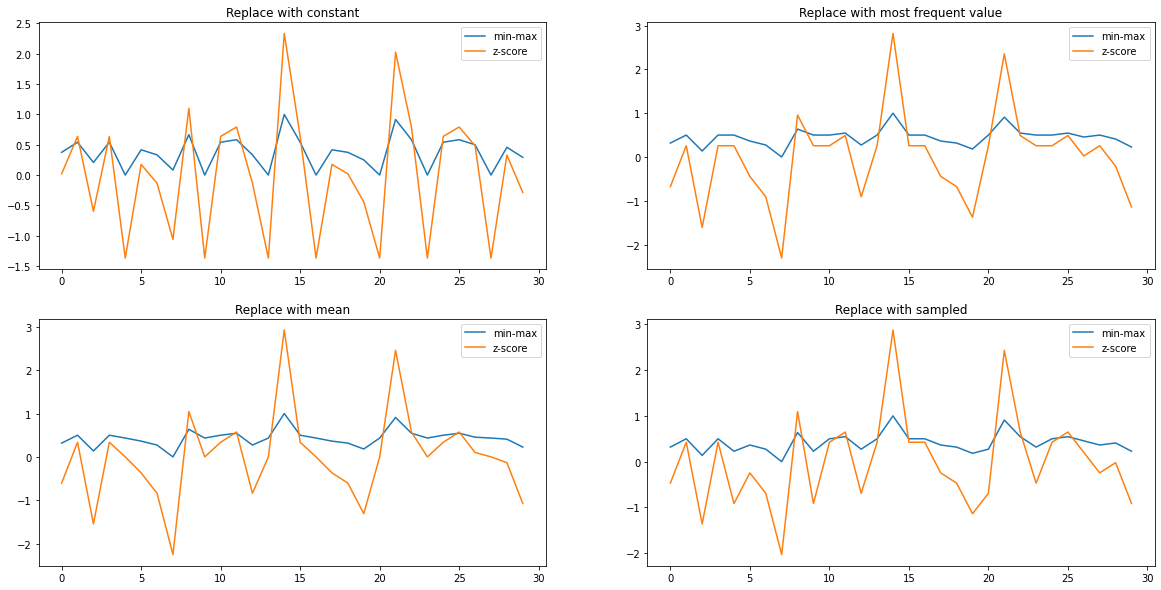

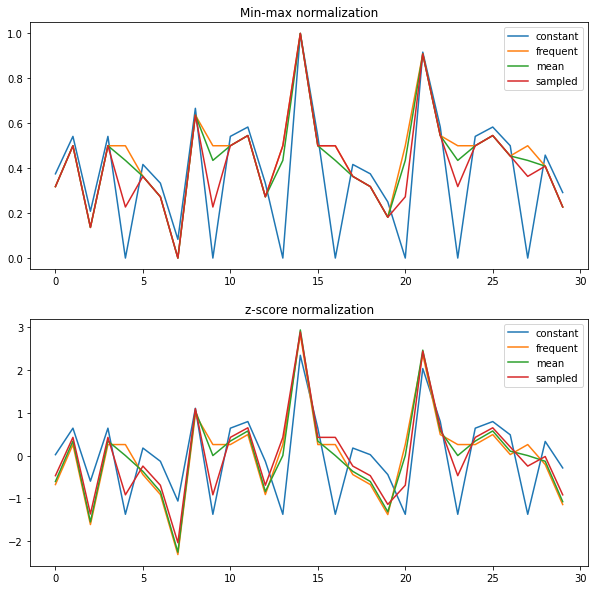

In [95]:
def min_max_normalization(data):
    data_min  = np.min(data)
    data_max  = np.max(data)
    norm_data = data * 0
    for i,dp in enumerate(data):
        norm_data[i] = (dp - data_min) / (data_max - data_min)
    return norm_data

def z_score_normalization(data):
    data_mean = np.mean(data)
    data_std  = np.std(data)
    norm_data = data * 0
    for i,dp in enumerate(data):
        norm_data[i] = (dp - data_mean) / data_std
    return norm_data

fig,ax = plt.subplots(2,2, figsize=(20,10))
data_types = [new_data_constant,new_data_frequent,new_data_mean,new_data_sampled]
columns = ['Replace with constant','Replace with most frequent value','Replace with mean','Replace with sampled']
cols = [0,0,1,1]
lins = [0,1,0,1]
for i in range(4):
    ax[cols[i],lins[i]].plot(min_max_normalization(data_types[i]),label='min-max')
    ax[cols[i],lins[i]].plot(z_score_normalization(data_types[i]),label='z-score')
    ax[cols[i],lins[i]].legend()
    ax[cols[i],lins[i]].title.set_text(columns[i])
    count += 1
plt.show()

fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
titles = ['Min-max normalization', 'z-score normalization']
funcs = [min_max_normalization,z_score_normalization]
axs = [ax1,ax2]
def plot(f,i,a):
    a.plot(f(new_data_constant),label='constant')
    a.plot(f(new_data_frequent),label='frequent')
    a.plot(f(new_data_mean    ),label='mean')
    a.plot(f(new_data_sampled ),label='sampled')
    a.legend()
    a.title.set_text(titles[i])

for i in range(2):
    plot(funcs[i],i,axs[i])
plt.show()    


5. Now the values $<5,12,23,35>$ have to be added. Normalize them with each of the approaches.

6. Use the iris data set and randomly delete 15 values from the first column and pretend they are missing data. Consider different imputation approaches to 'guess' the missing values. Calculate the Mean Average Error of each approach by using the hidden values and the imputed values. Try the approaches:
- Replace by the mean of the column.
- Replace by the mean of the respective class.
- Replace by the value of the nearest neighbor.
Next you have some code with solutions for the two first taks. If you know pandas and python try to solve them before you look at the code.

In [69]:
import pandas as pd
import numpy as np
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
# get first column as an array
fc=np.array(iris[['sepal_length']])
# we need the sample method from the random library
import random
# todel is a sample of 15 values
todel=random.sample(range(0,len(fc)),15)
# keep the original values in 'keep'
fc_nan=fc
# insert nan in the 15 randomly chosen positions
fc_nan[todel]=np.nan
# calculate the mean of the of the other values
simplemean=np.nanmean(fc_nan)
print("Mean of column ignoring NaN= ",simplemean)
print("Std of column ignoring NaN= ",np.nanstd(fc_nan))
# replace the positions with the mean (imputation 1)
fc_imp1=fc_nan
fc_imp1[todel]=simplemean
print("Mean of column after imputing simple mean= ",np.mean(fc_imp1))
print("Std of column fter imputing simple mean= ",np.nanstd(fc_imp1))
# Imputation 2, replace by the mean of the respective class
# Each of the positions has a different class. Let do it for the first one
# go to iris and use loc (localizer) to fetch the line with number todel[0] and column (species)
classname=iris.loc[todel[0],'species']
# now calculate the mean only for this class
# get the indexes of the cases for that class
class_idx=np.where(iris.species=='versicolor')
# calculate the mean of fc_nan (the one with the missing values) for that class only
mean_class1=np.nanmean(fc_nan[class_idx])
print("The mean for class ",classname," is ",mean_class1)
# impute the mean of the class
fc_imp2=fc_nan
fc_imp1[todel[0]]=mean_class1
# this was just for one value. We could have done this for all the values in one go
# get the means for the 3 classes and put them in one array
# the initial array for the means. zeros for now
class_means=np.zeros(3)
# build a list with class names
class_names=[0]*3
for p in [(0,0),(1,50),(2,100)]: 
    class_names[p[0]]=iris.loc[p[1],'species']
# Now get the means and put them in the class_means array
for i in range(0,3):
    current_class=class_names[i]
    class_idx=np.where(iris.species==current_class)
    class_means[i]=np.nanmean(fc_nan[class_idx])
# Now we have the means we can process all the NaN
for i in range(0,15):
    case_idx=todel[i]
    class_of_case=iris.loc[case_idx,'species']
    # impute case with mean of class
    fc_imp2[case_idx]=class_means[class_names.index(class_of_case)]
    print("imputing",class_means[class_names.index(class_of_case)],"in case", case_idx, "of class", class_of_case)
# What was the impact in mean and std?
print("Mean of column after imputing class mean= ",np.mean(fc_imp2))
print("Std of column fter imputing class mean= ",np.nanstd(fc_imp2))
# to replace with the mean of nearest neighbor we need to build the distance matrix for the examples
# find the nearest neighbor for each of the missing cases, get its value and then impute



Mean of column ignoring NaN=  5.8496296296296295
Std of column ignoring NaN=  0.8203769751427129
Mean of column after imputing simple mean=  5.849629629629629
Std of column fter imputing simple mean=  0.7782779344230932
The mean for class  versicolor  is  5.9229629629629645
imputing 5.924429629629629 in case 73 of class versicolor
imputing 6.510962962962963 in case 104 of class virginica
imputing 5.924429629629629 in case 78 of class versicolor
imputing 6.510962962962963 in case 119 of class virginica
imputing 5.114962962962963 in case 38 of class setosa
imputing 6.510962962962963 in case 129 of class virginica
imputing 5.114962962962963 in case 16 of class setosa
imputing 5.924429629629629 in case 77 of class versicolor
imputing 5.114962962962963 in case 42 of class setosa
imputing 6.510962962962963 in case 140 of class virginica
imputing 5.924429629629629 in case 66 of class versicolor
imputing 5.114962962962963 in case 12 of class setosa
imputing 5.114962962962963 in case 45 of clas

7. Consider the dataset of cardiac patients that you can download in moodle.Examine this data and decide what steps of preprocessing may be useful (and why). 